# Proyecto individual de DA: Gaming

## Objetivo de negocio:
Grupo inversor está dispuesto a invertir en el desarrollo de nuevos productos, para ello, nos solicitar lo siguietne:
* Analizar el mercado de videojuegos.
* Identificar posibles nichos para desarrollar nuevos productos.
* Encontrar los insights y presentarlos.

### Preguntas a considerar y responder

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países? 
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### Dataset a utilizar
| Archivos:
| ------ 
| Indicadores_del_desarrollo_humano_mundial Banco Mundial Indicadores de desarrollo humano. 
| Console_sales Reporte de ventas anuales de consolas. por marca y modelo. 
| Juegos en steam. Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc. 
| Video Games Sales Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global). 

## Fases de trabajo
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 10% las ventas por sector para el próximo trimestre.*
   2.  *Aumentar en un 10% la plataforma Steam.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

> ## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Análisis univariado y bivariado
4. Registros duplicados
5. Conclusiones

#### Nota:
El análisis se dividirá en dos partes, eda_1 (contiene solo el primero de los datasets) y eda_2 (contiene los restantes 3).

#### 1.1. Importar Librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.2. Creación del DataFrame 1_Indicadores_desarollo_humano_mundial

##### 1.2.1. Hoja: Data

In [2]:
df_1_1 = pd.read_excel('dataset/1_Indicadores_desarrollo_humano_mundial.xlsx', sheet_name='Data')

In [3]:
df_1_1

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Estados Unidos,USA,9632030,9632030,9632030,9632030,9632030,9632030,...,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,..
1,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Unión Europea,EUU,4384964.995117,4384984.995117,4385294.995117,4385644.995117,4385414.995117,4385434.995117,...,4386039.990234,4386021.99707,4383341.99707,4384062.192383,4384082.592773,4384131.577148,4384317.592773,4384317.592773,4384317.592773,..
2,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Japón,JPN,377800,377880,377890,377900,377910,377910,...,377950,377955,377960,377961.992188,377961.992188,377971.015625,377970,377970,377970,..
3,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Mundo,WLD,131606512.293178,131606902.668177,131607327.418178,131607728.793148,131605872.777079,131607830.159892,...,131805574.218215,131805826.432909,131803288.425096,132047813.110236,132046109.51847,132048793.077485,132036620.811879,132036620.811879,132025199.411879,..
4,"INB, método Atlas (US$ a precios actuales)",NY.GNP.ATLS.CD,Estados Unidos,USA,10147603801972.083984,10462204209818.1875,10732675433275.623047,11536447371063.488281,12740511355508.546875,13651359826763.560547,...,15154198695429.419922,15756881924473.791016,16560497008306.333984,17048936792646.988281,17776476297335.480469,18191395170920.964844,18467339419486.53125,19194752830167.121094,20636317813893.097656,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
unique_series_name = df_1_1['Series Name'].unique()
unique_series_name 

KeyError: 'Series Name'

**Consideraciones:**
Para este análisis se trabajará con los siguientes valores de Series Name:
* 'INB per cápita, PPA (a $ internacionales actuales)'
* 'Tasa de fertilidad, total (nacimientos por cada mujer)'
* 'Área selvática  (kilómetros cuadrados)'
* 'Crecimiento del PIB (% anual)'
* 'Tiempo necesario para iniciar un negocio (días)'
* 'Crédito interno proporcionado por el sector financiero (% del PIB)'
* 'Recaudación impositiva (% del PIB)'
* 'Índice de términos netos de intercambio (2000 = 100)'
* 'Deuda externa acumulada, total (DOD, US$ a precios actuales)'
* 'Migración neta'
* 'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)'
* 'Desempleo, total (% de la población activa total) (estimación modelado OIT)'
* 'Población entre 0 y 14 años de edad, total'

In [5]:
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    234 non-null    object
 1   Series Code    232 non-null    object
 2   Country Name   232 non-null    object
 3   Country Code   232 non-null    object
 4   2000 [YR2000]  232 non-null    object
 5   2001 [YR2001]  232 non-null    object
 6   2002 [YR2002]  232 non-null    object
 7   2003 [YR2003]  232 non-null    object
 8   2004 [YR2004]  232 non-null    object
 9   2005 [YR2005]  232 non-null    object
 10  2006 [YR2006]  232 non-null    object
 11  2007 [YR2007]  232 non-null    object
 12  2008 [YR2008]  232 non-null    object
 13  2009 [YR2009]  232 non-null    object
 14  2010 [YR2010]  232 non-null    object
 15  2011 [YR2011]  232 non-null    object
 16  2012 [YR2012]  232 non-null    object
 17  2013 [YR2013]  232 non-null    object
 18  2014 [YR2014]  232 non-null   

In [6]:
df_1_1 = df_1_1.dropna()

In [7]:
df_1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    232 non-null    object
 1   Series Code    232 non-null    object
 2   Country Name   232 non-null    object
 3   Country Code   232 non-null    object
 4   2000 [YR2000]  232 non-null    object
 5   2001 [YR2001]  232 non-null    object
 6   2002 [YR2002]  232 non-null    object
 7   2003 [YR2003]  232 non-null    object
 8   2004 [YR2004]  232 non-null    object
 9   2005 [YR2005]  232 non-null    object
 10  2006 [YR2006]  232 non-null    object
 11  2007 [YR2007]  232 non-null    object
 12  2008 [YR2008]  232 non-null    object
 13  2009 [YR2009]  232 non-null    object
 14  2010 [YR2010]  232 non-null    object
 15  2011 [YR2011]  232 non-null    object
 16  2012 [YR2012]  232 non-null    object
 17  2013 [YR2013]  232 non-null    object
 18  2014 [YR2014]  232 non-null    obje

##### 1.2.2. Hoja: Series - Metadata

In [8]:
df_1_2 = pd.read_excel('dataset/1_Indicadores_desarrollo_humano_mundial.xlsx', sheet_name='Series - Metadata')

In [9]:
df_1_2

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Periodicity,Base Period,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Other notes,License URL
0,AG.SRF.TOTL.K2,CC BY-4.0,Surface area (sq. km),NaN,"Surface area is a country's total area, includ...","Food and Agriculture Organization, electronic ...",Environment: Land use,NaN,Annual,NaN,Sum,Total land area includes inland water bodies s...,Total surface area is particularly important f...,The data are collected by the Food and Agricul...,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1,NY.GNP.ATLS.CD,CC BY-4.0,"GNI, Atlas method (current US$)",NaN,GNI (formerly GNP) is the sum of value added b...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Atl...,NaN,Annual,NaN,Gap-filled total,In calculating GNI and GNI per capita in U.S. ...,Because development encompasses many factors -...,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,NY.GNP.PCAP.CD,CC BY-4.0,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Atl...,NaN,Annual,NaN,Weighted average,The World Bank uses Atlas method GNI per capit...,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
3,NY.GNP.MKTP.PP.CD,CC BY-4.0,"GNI, PPP (current international $)",NaN,This indicator provides values for gross natio...,"International Comparison Program, World Bank |...",Economic Policy & Debt: Purchasing power parity,NaN,Annual,NaN,Gap-filled total,"Typically, higher income countries have higher...",Because development encompasses many factors -...,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
4,NY.GNP.PCAP.PP.CD,CC BY-4.0,"GNI per capita, PPP (current international $)",NaN,This indicator provides per capita values for ...,"International Comparison Program, World Bank |...",Economic Policy & Debt: Purchasing power parity,NaN,Annual,NaN,Weighted average,"Typically, higher income countries have higher...",NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
5,SP.DYN.LE00.IN,CC BY-4.0,"Life expectancy at birth, total (years)",NaN,Life expectancy at birth indicates the number ...,(1) United Nations Population Division. World ...,Health: Mortality,NaN,Annual,NaN,Weighted average,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,Annual data series from United Nations Populat...,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
6,SP.DYN.TFRT.IN,CC BY-4.0,"Fertility rate, total (births per woman)",NaN,Total fertility rate represents the number of ...,(1) United Nations Population Division. World ...,Health: Reproductive health,NaN,Annual,NaN,Weighted average,Total fertility rates are based on data on reg...,Reproductive health is a state of physical and...,Annual data series from United Nations Populat...,Relevance to gender indicator: it can indicate...,NaN,https://datacatalog.worldbank.org/public-licen...
7,SP.DYN.CONU.ZS,CC BY-4.0,"Contraceptive prevalence, any methods (% of wo...",NaN,Contraceptive prevalence rate is the percentag...,UNICEF's State of the World's Children and Chi...,Health: Reproductive health,NaN,Annual,NaN,Weighted average,Contraceptive prevalence reflects all methods ...,Reproductive health is a state of physical and...,NaN,Contraceptive prevalence amongst women of repr...,NaN,https://datacatalog.worldbank.org/public-licen...
8,SH.STA.BRTC.ZS,CC BY-4.0,Births attended by skilled health staff (% of ...,NaN,Births attended by skilled health staff are th...,"UNICEF, State of the World's Children, Childin...",Health: Reproductive health,NaN,Annual,NaN,Weighted average,NaN,Reproductive health is a state of physical and...,For the indicators that are from household sur...,Assistance by trained professional

In [10]:
df_1_2 = df_1_2.dropna(axis=1)


In [11]:
df_1_2.columns

Index(['Code', 'License Type', 'Indicator Name', 'Long definition', 'Source',
       'Topic', 'Periodicity', 'License URL'],
      dtype='object')

In [12]:
df_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Code             58 non-null     object
 1   License Type     58 non-null     object
 2   Indicator Name   58 non-null     object
 3   Long definition  58 non-null     object
 4   Source           58 non-null     object
 5   Topic            58 non-null     object
 6   Periodicity      58 non-null     object
 7   License URL      58 non-null     object
dtypes: object(8)
memory usage: 3.8+ KB


Lo mismo se hace con df_1_2

In [13]:
df_1_2.columns = df_1_2.columns.str.replace('_', ' ').str.title().str.replace(' ', '_')
df_1_2.columns

Index(['Code', 'License_Type', 'Indicator_Name', 'Long_Definition', 'Source',
       'Topic', 'Periodicity', 'License_Url'],
      dtype='object')

Y similar con df_1_1

In [14]:
# Crear una función para limpiar los nombres de las columnas
def limpiar_nombre_columna(nombre):
    nombre_limpio = nombre.split(' [')[0]  # Eliminar corchetes y lo que está dentro
    nombre_limpio = nombre_limpio.replace(' ', '_')  # Reemplazar espacios por guiones
    return nombre_limpio

# Aplicar la función a los nombres de las columnas
df_1_1.columns = [limpiar_nombre_columna(col) for col in df_1_1.columns]

# Mostrar los nuevos nombres de las columnas
print(df_1_1.columns)

Index(['Series_Name', 'Series_Code', 'Country_Name', 'Country_Code', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')


#### 1.6. Observaciones

* Los tamaños de los DataFrame son pequeños y probablemente no existan problemas al trabarlos en un tablero de control.
* Se han eliminado algunas columnas por datos faltantes. Pero se resolverá en análisis posteriores si se eliminan más por irrelevancia.
* Se observa que el dataframe df_1_1 tiene una estructura rara. Se resolverá más adelante si se normaliza o se deja como está.
* Se ha observado cambiar los nombres de las columnas del df_3 para que queden todos iguales.

#### 2.1. Análisis de nulos

In [15]:
df_1_1.isnull().sum()

Series_Name     0
Series_Code     0
Country_Name    0
Country_Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
dtype: int64

In [16]:
df_1_2.isnull().sum()

Code               0
License_Type       0
Indicator_Name     0
Long_Definition    0
Source             0
Topic              0
Periodicity        0
License_Url        0
dtype: int64

#### 2.2. Normalizacion de valores

##### 2.2.1. Se eliminan columnas innecesarias

In [17]:
df_1_1 = df_1_1.drop(columns=["Series_Code", "Country_Name"])

##### 2.2.2. Normalización de valores dentro de la columna Series_Name en df_1_1

In [18]:
unique_country = df_1_1['Country_Code'].unique()

In [19]:
unique_country

array(['USA', 'EUU', 'JPN', 'WLD'], dtype=object)

In [20]:
# Supongamos que df_1_1 es tu DataFrame
df_1_1['Country_Code'] = df_1_1['Country_Code'].replace('EUU', 'EU')

# Mostrar el DataFrame actualizado
print(unique_country)

['USA' 'EUU' 'JPN' 'WLD']


#### 2.3. Observaciones:
* No se observan nulos.

#### 3. Búsqueda de valores atípicos o outliers

Para ello, se procederá a graficar valores en histogramas y boxplots.

**Consideraciones**: existe la problemática de la línea del tiempo en el dataframe df_1_1. 

##### 3.1. Distribución de los valores en columnas numéricas

##### 3.1.1. df_1_1

**Consideraciones:**
Para este análisis se trabajará con los siguientes valores de Series Name:
* 'INB per cápita, PPA (a $ internacionales actuales)'
* 'Tasa de fertilidad, total (nacimientos por cada mujer)'
* 'Área selvática  (kilómetros cuadrados)'
* 'Crecimiento del PIB (% anual)'
* 'Tiempo necesario para iniciar un negocio (días)'
* 'Crédito interno proporcionado por el sector financiero (% del PIB)'
* 'Recaudación impositiva (% del PIB)'
* 'Índice de términos netos de intercambio (2000 = 100)'
* 'Deuda externa acumulada, total (DOD, US$ a precios actuales)'
* 'Migración neta'
* 'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)'
* 'Desempleo, total (% de la población activa total) (estimación modelado OIT)'
* 'Población entre 0 y 14 años de edad, total'
* 'Población entre 15 y 64 años de edad, total'

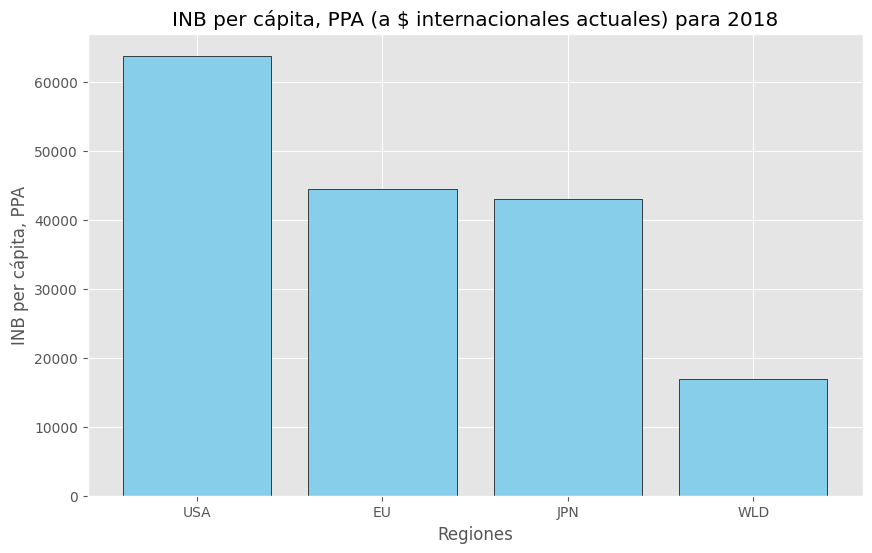

In [21]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "INB per cápita, PPA (a $ internacionales actuales)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('INB per cápita, PPA (a $ internacionales actuales) para 2018')
plt.xlabel('Regiones')
plt.ylabel('INB per cápita, PPA')
plt.show()

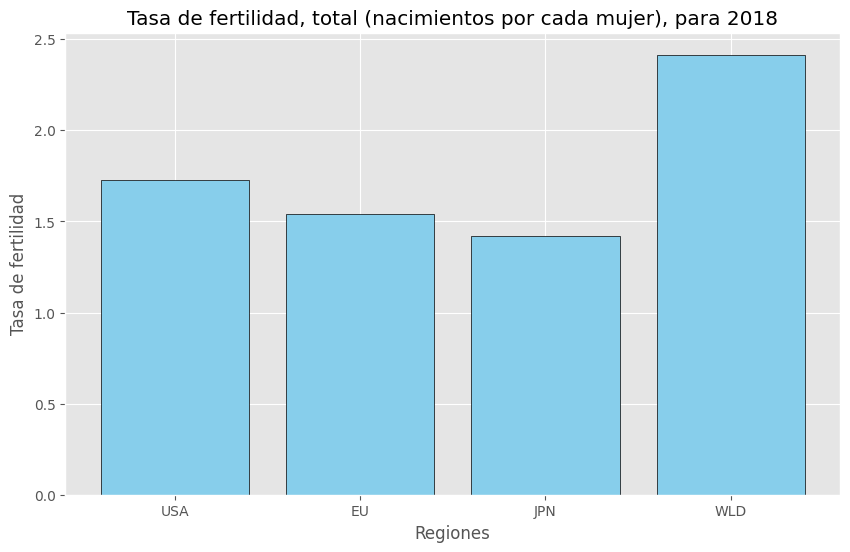

In [22]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Tasa de fertilidad, total (nacimientos por cada mujer)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Tasa de fertilidad, total (nacimientos por cada mujer), para 2018')
plt.xlabel('Regiones')
plt.ylabel('Tasa de fertilidad')
plt.show()

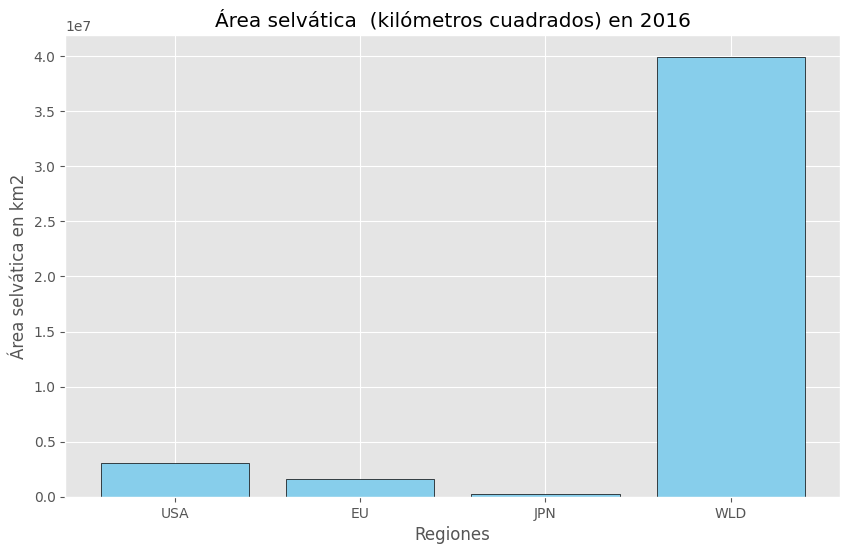

In [23]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Área selvática  (kilómetros cuadrados)"]

# Seleccionar los primeros 4 valores de la columna "2016"
columna = filtro["2016"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Área selvática  (kilómetros cuadrados) en 2016')
plt.xlabel('Regiones')
plt.ylabel('Área selvática en km2')
plt.show()

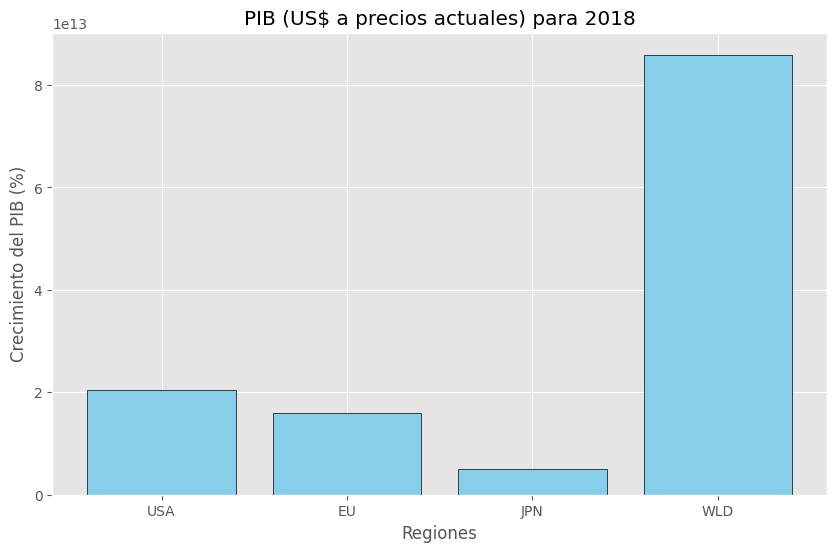

In [76]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "PIB (US$ a precios actuales)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('PIB (US$ a precios actuales) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Crecimiento del PIB (%)')
plt.show()

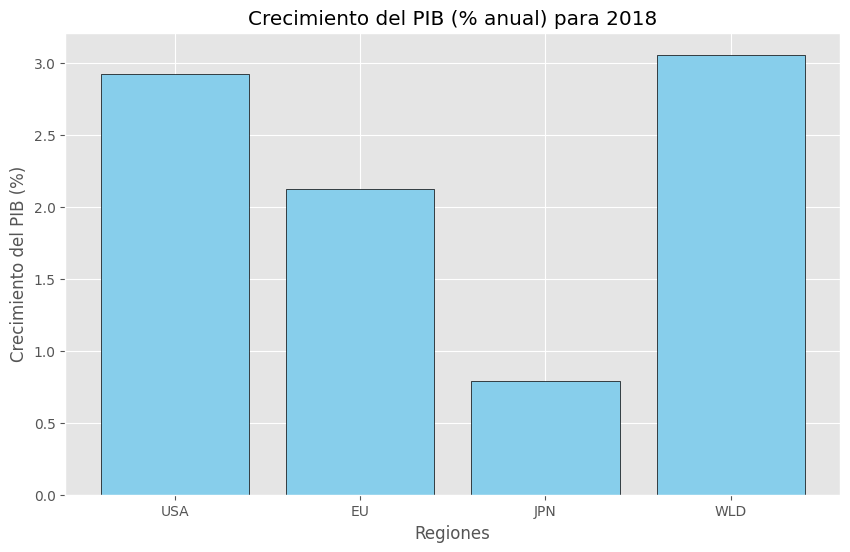

In [77]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Crecimiento del PIB (% anual)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Crecimiento del PIB (% anual) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Crecimiento del PIB (%)')
plt.show()

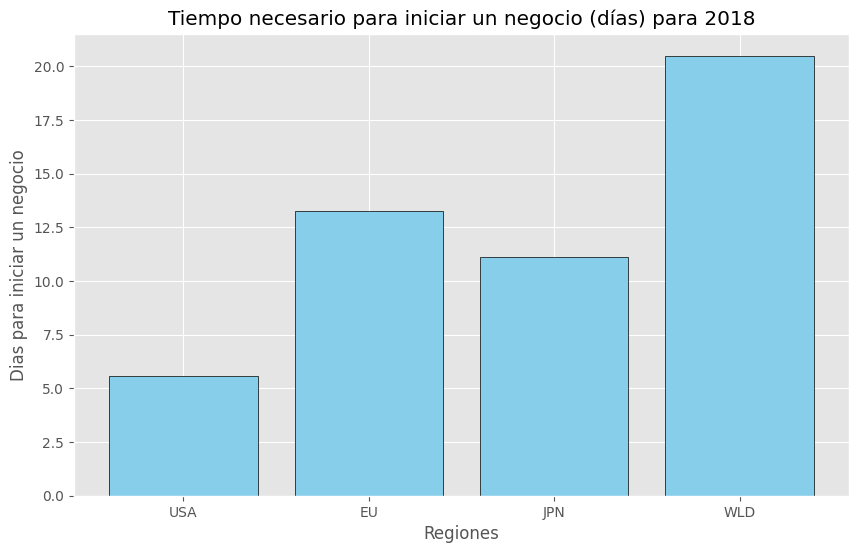

In [25]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Tiempo necesario para iniciar un negocio (días)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Tiempo necesario para iniciar un negocio (días) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Dias para iniciar un negocio')
plt.show()

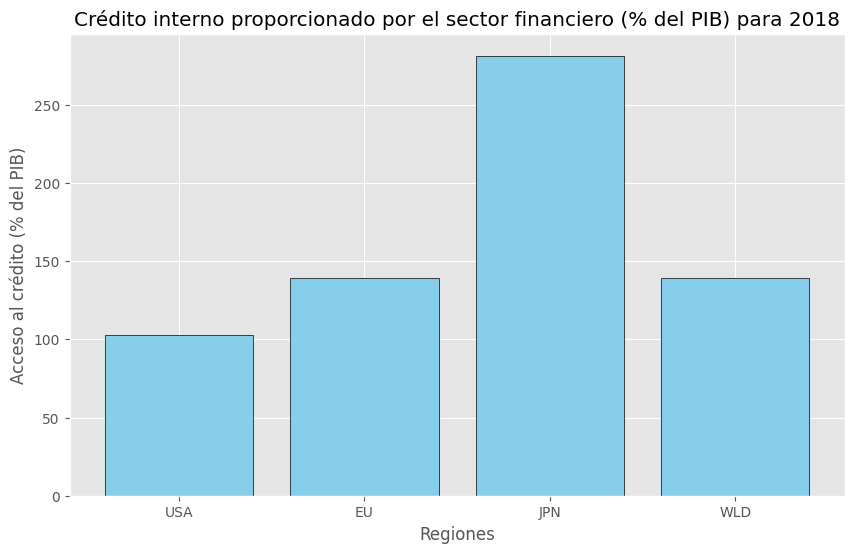

In [26]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Crédito interno proporcionado por el sector financiero (% del PIB)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Crédito interno proporcionado por el sector financiero (% del PIB) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Acceso al crédito (% del PIB)')
plt.show()

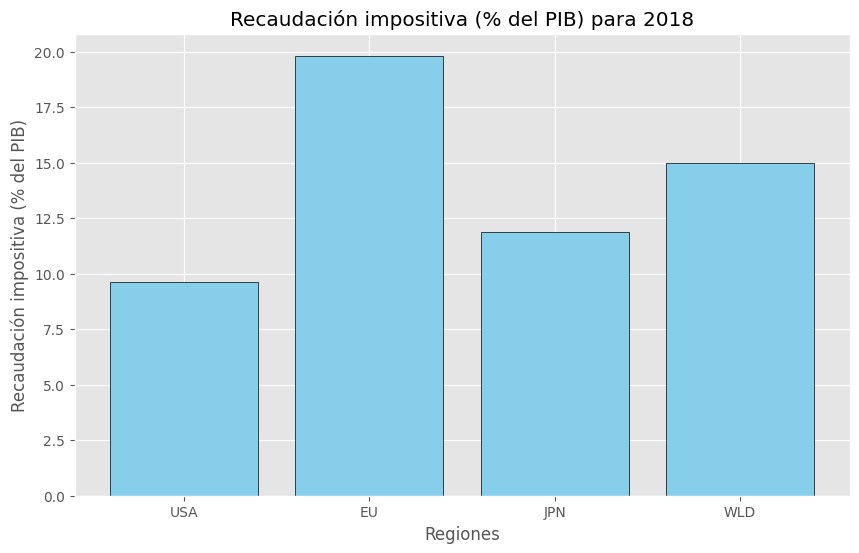

In [27]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Recaudación impositiva (% del PIB)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Recaudación impositiva (% del PIB) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Recaudación impositiva (% del PIB)')
plt.show()

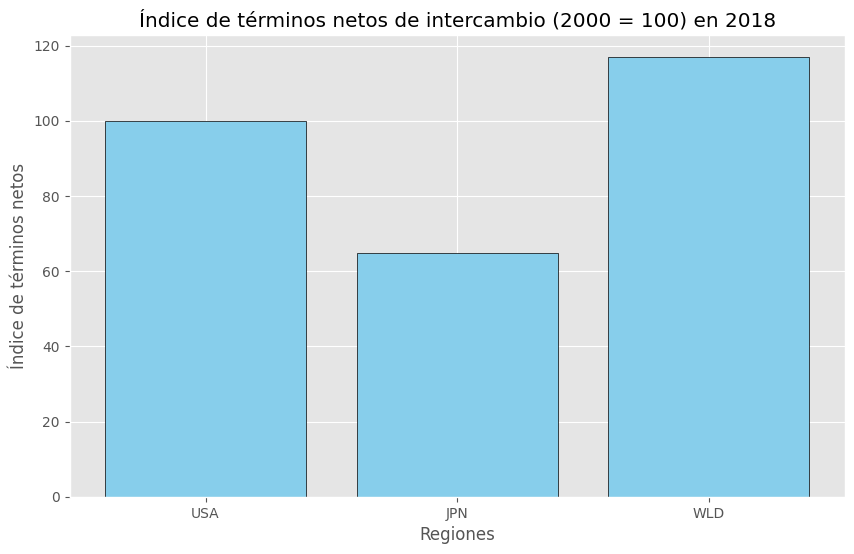

In [28]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Índice de términos netos de intercambio (2000 = 100)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[[0,2,3]]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Índice de términos netos de intercambio (2000 = 100) en 2018')
plt.xlabel('Regiones')
plt.ylabel('Índice de términos netos')
plt.show()

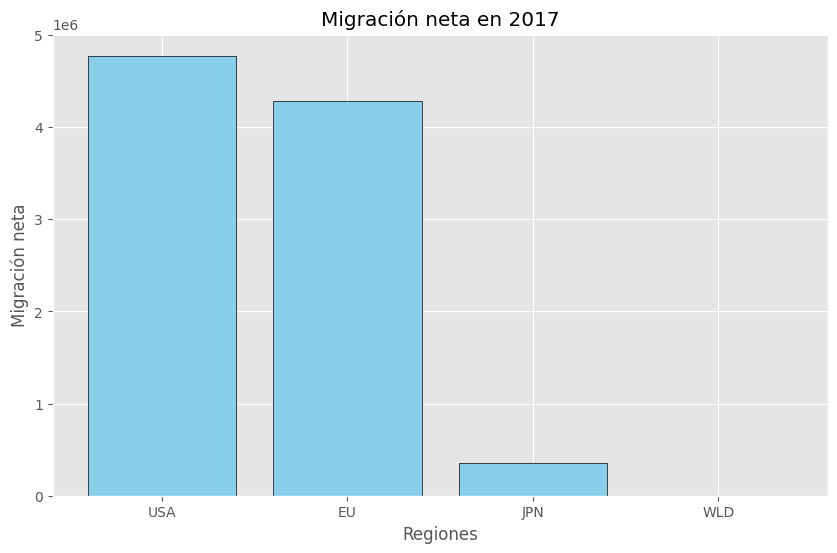

In [29]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Migración neta"]

# Seleccionar los primeros 4 valores de la columna "2017"
columna = filtro["2017"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Migración neta en 2017')
plt.xlabel('Regiones')
plt.ylabel('Migración neta')
plt.show()

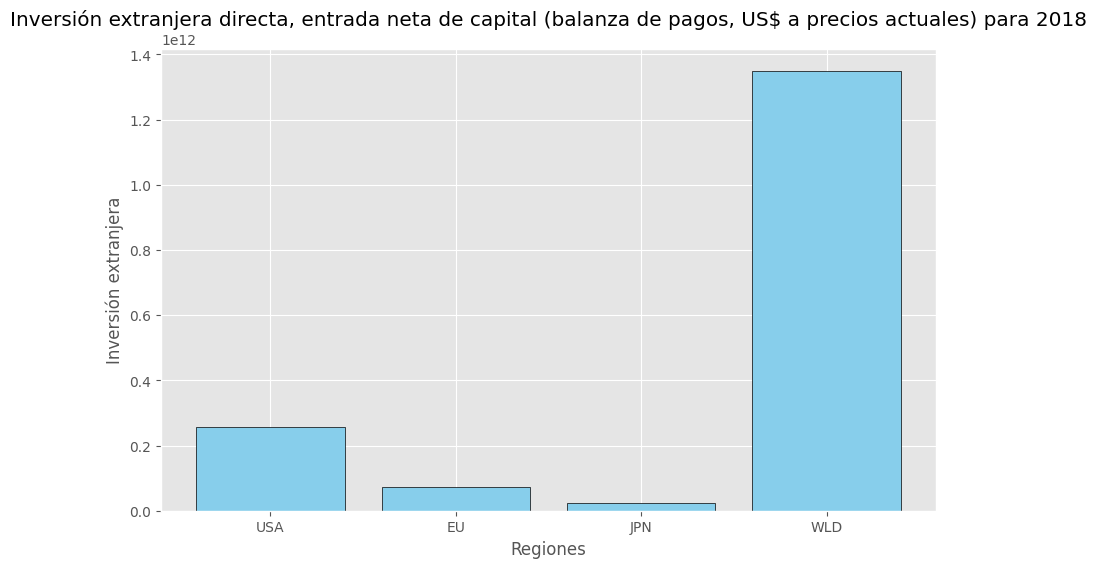

In [30]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Inversión extranjera')
plt.show()

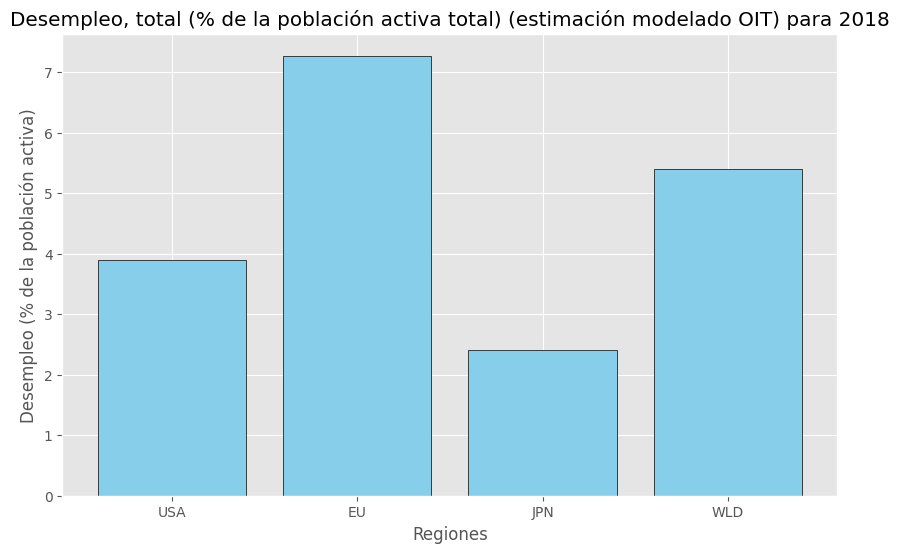

In [31]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Desempleo, total (% de la población activa total) (estimación modelado OIT)"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Desempleo, total (% de la población activa total) (estimación modelado OIT) para 2018')
plt.xlabel('Regiones')
plt.ylabel('Desempleo (% de la población activa)')
plt.show()

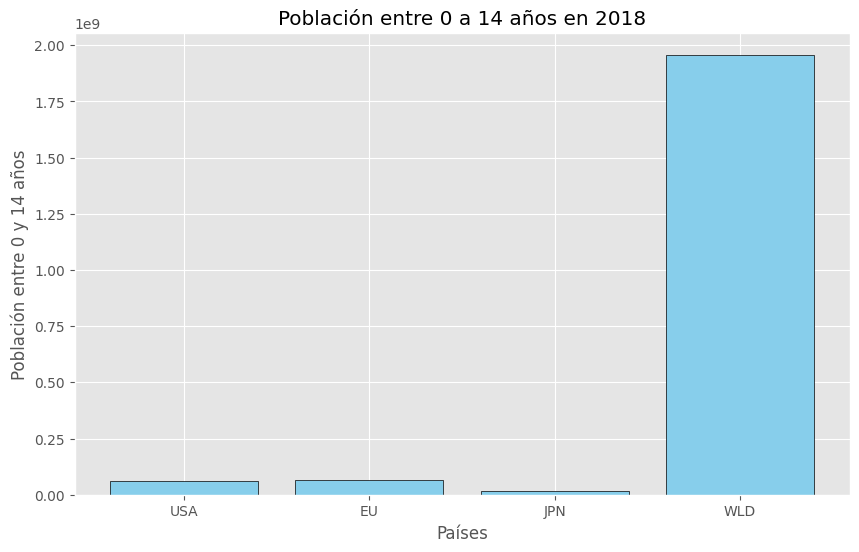

In [34]:
# Filtrar el DataFrame por la columna "Series_Name"
filtro = df_1_1[df_1_1["Series_Name"] == "Población entre 0 y 14 años de edad, total"]

# Seleccionar los primeros 4 valores de la columna "2018"
columna = filtro["2018"].iloc[:4]

# Convertir los valores a tipo numérico, ignorando los errores
columna = pd.to_numeric(columna, errors='coerce')

# Eliminar valores NaN (resultantes de la conversión de texto no numérico)
columna = columna.dropna()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(["USA", "EU", "JPN", "WLD"], columna, color='skyblue', edgecolor='black')
plt.title('Población entre 0 a 14 años en 2018')
plt.xlabel('Países')
plt.ylabel('Población entre 0 y 14 años')
plt.show()

Observaciones: 
* No se encuentran valores atípicos, outliers o anómalos.
* WLD parece atractivo por el lado de la población, tasa de natalidad y superficie a explotar (área selvática).
* USA es atractivo por el lado del tiempo necesario para montar un negocio (5 días), recaudación respecto al PIB, acceso al crédito, crecimiento del PIB, superficie a explotar, e inversión extranjera.
* Tanto EU como JPN están rezagados, y por lo visto, no son tan atractivos como los primeros dos.
* Pero como WLD es muy amplio, USA resultaría ser el más favorecido a la hora de invertir.
* La deuda externa no tiene datos suficientes, por lo cual, se quita del análisis.

#### 4. Análisis de tendencia

**Consideraciones**: se seguirá el modelo del análisis de outliers pero analizando por tiempo.

##### 4.1. df_1_1

In [36]:
df_1_1.head(4)

,Series_Name,Country_Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Superficie (kilómetros cuadrados),USA,9632030,9632030,9632030,9632030,9632030,9632030,9632030,9632030,...,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,..
1,Superficie (kilómetros cuadrados),EU,4384964.995117,4384984.995117,4385294.995117,4385644.995117,4385414.995117,4385434.995117,4385724.995117,4385704.995117,...,4386039.990234,4386021.99707,4383341.99707,4384062.192383,4384082.592773,4384131.577148,4384317.592773,4384317.592773,4384317.592773,..
2,Superficie (kilómetros cuadrados),JPN,377800,377880,377890,377900,377910,377910,377920,377930,...,377950,377955,377960,377961.992188,377961.992188,377971.015625,377970,377970,377970,..
3,Superficie (kilómetros cuadrados),WLD,131606512.293178,131606902.668177,131607327.418178,131607728.793148,131605872.777079,131607830.159892,131608165.134891,131608206.109878,...,131805574.218215,131805826.432909,131803288.425096,132047813.110236,132046109.51847,132048793.077485,132036620.811879,132036620.811879,132025199.411879,..


In [37]:
df_1_1 = df_1_1.iloc[:, :-1]

In [38]:
# Transponer el DataFrame para el análisis
df_1_1_t = df_1_1.transpose()
df_1_1_t

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
Series_Name,Superficie (kilómetros cuadrados),Superficie (kilómetros cuadrados),Superficie (kilómetros cuadrados),Superficie (kilómetros cuadrados),"INB, método Atlas (US$ a precios actuales)","INB, método Atlas (US$ a precios actuales)","INB, método Atlas (US$ a precios actuales)","INB, método Atlas (US$ a precios actuales)","INB per cápita, método Atlas (US$ a precios ac...","INB per cápita, método Atlas (US$ a precios ac...",...,"Población entre 15 y 64 años de edad, mujeres","Población entre 15 y 64 años de edad, mujeres","Población entre 15 y 64 años de edad, total","Población entre 15 y 64 años de edad, total","Población entre 15 y 64 años de edad, total","Población entre 15 y 64 años de edad, total","Población activa, mujeres (% de la población a...","Población activa, mujeres (% de la población a...","Población activa, mujeres (% de la población a...","Población activa, mujeres (% de la población a..."
Country_Code,USA,EU,JPN,WLD,USA,EU,JPN,WLD,USA,EU,...,JPN,WLD,USA,EU,JPN,WLD,USA,EU,JPN,WLD
2000,9632030,4384964.995117,377800,131606512.293178,10147603801972.083984,7922739957040.177734,4595162800787.34082,33561947316609.425781,35960,18453.789275,...,42839220,1904116650,186123865,289419527,86547107,3848454670,45.562645,43.552329,40.3536,39.493477
2001,9632030,4384984.995117,377880,131606902.668177,10462204209818.1875,7639017402698.374023,4675882499303.015625,33848117667858.640625,36710,17769.469855,...,42736040,1936530565,188528528,289835272,86351420,3913855934,45.621492,43.643783,40.556201,39.474709
2002,9632030,4385294.995117,377890,131607327.418178,10732675433275.623047,7515657598848.955078,4434184873540.571289,34017960211925.816406,37310,17442.498354,...,42632297,1971223387,190730595,290496921,86156721,3984135046,45.673366,43.787335,40.524048,39.475697
2003,9632030,4385644.995117,377900,131607728.793148,11536447371063.488281,8523562906388.888672,4479549240351.105469,36997067184469.984375,39770,19711.491038,...,42511460,2007338808,192788756,291505694,85930942,4057586010,45.823671,43.999299,40.695442,39.509199
2004,9632030,4385414.995117,377910,131605872.777079,12740511355508.546875,10408524663469.884766,4899554578633.611328,42684534716336.234375,43510,23980.552493,...,42287796,2043337178,195059592,292581249,85503551,4131084573,45.754826,44.139039,40.852812,39.487061
2005,9632030,4385434.995117,377910,131607830.159892,13651359826763.560547,12019963315038.761719,5182637712714.898438,47889487891691.554688,46190,27595.182359,...,42017934,2078256581,197426230,293620893,84991747,4202650595,45.787307,44.247409,40.997968,39.503037
2006,9632030,4385724.995117,377920,131608165.134891,14285630945718.449219,12933305815644.914062,5105064678226.856445,51727094199598.09375,47880,29595.797613,...,41797207,2111453512,199322426,294228323,84556631,4270225325,45.769637,44.451845,41.124422,39.414396
2007,9632030,4385704.995117,377930,131608206.109878,14608317798282.019531,13880684138736.708984,4959300110562.365234,55816858147447.578125,48500,31657.20526,...,41570784,2143773746,201337589,294924755,84116655,4336247546,45.82259,44.5756,41.119396,39.372364


In [39]:
# Renombrar columnas
df_1_1_t.columns = df_1_1_t.iloc[0]
df_1_1_t = df_1_1_t[1:]

In [40]:
columnas_unicas = df_1_1_t.columns[~df_1_1_t.columns.duplicated()]
columnas_unicas 

Index(['Superficie (kilómetros cuadrados)',
       'INB, método Atlas (US$ a precios actuales)',
       'INB per cápita, método Atlas (US$ a precios actuales)',
       'INB, PPA (a $ internacionales actuales)',
       'INB per cápita, PPA (a $ internacionales actuales)',
       'Esperanza de vida al nacer, total (años)',
       'Tasa de fertilidad, total (nacimientos por cada mujer)',
       'Prevalencia de uso de métodos anticonceptivos (% de mujeres entre 15 y 49 años)',
       'Nacimientos asistidos por personal de salud capacitado (% del total)',
       'Tasa de mortalidad, menores de 5 años (por cada 1.000)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Inscripción escolar, nivel primario (% bruto)',
       'Inscripción escolar, nivel secundario (% bruto)',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Área selvática  (kilómetros cuadrados)',
       'Áreas pr

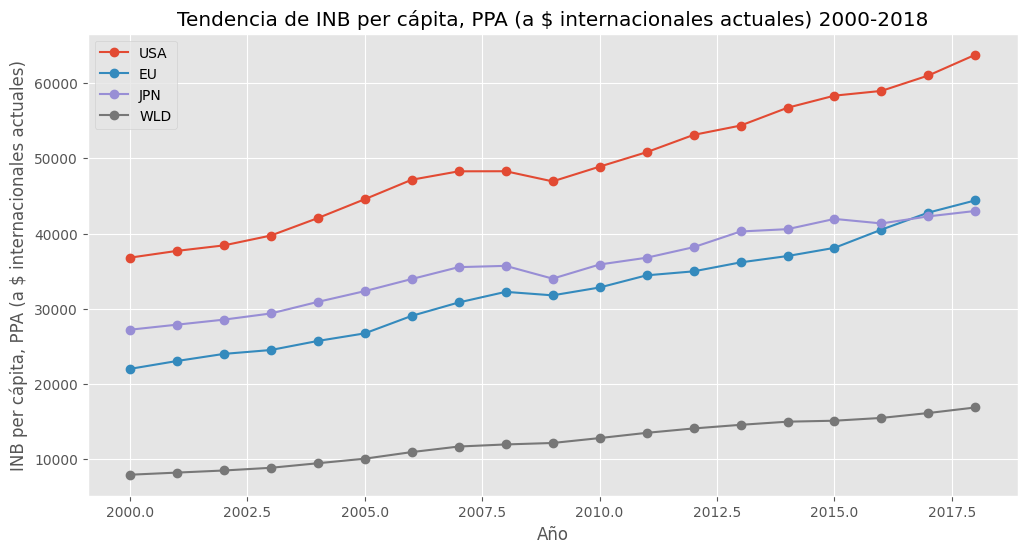

In [41]:
data = {
    'Country_Code': list(range(2000, 2019)),
    'USA': [36800, 37700, 38430, 39740, 42060, 44570, 47160, 48280, 48290, 46940, 48900, 50820, 53120, 54360, 56730, 58340, 58970, 61020, 63780],
    'EU': [22012.948826, 23059.884679, 24006.003789, 24521.622477, 25728.18648, 26735.436558, 29062.612128, 30845.392794, 32254.830183, 31789.879375, 32834.353589, 34449.881934, 34979.579658, 36172.123569, 37016.970997, 38104.813471, 40524.533564, 42793.872309, 44417.770857],
    'JPN': [27220, 27890, 28560, 29380, 30920, 32350, 33960, 35540, 35710, 34010, 35890, 36790, 38190, 40280, 40590, 41950, 41350, 42290, 43010],
    'WLD': [7942.251914, 8224.350834, 8503.933328, 8863.303582, 9468.130636, 10074.38831, 10952.568348, 11690.168249, 11967.755001, 12161.703592, 12814.761796, 13509.828595, 14092.987024, 14575.533169, 14994.405558, 15122.018719, 15494.415878, 16145.100293, 16884.819555]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Country_Code'], df['USA'], marker='o', label='USA')
plt.plot(df['Country_Code'], df['EU'], marker='o', label='EU')
plt.plot(df['Country_Code'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Country_Code'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('INB per cápita, PPA (a $ internacionales actuales)')
plt.title('Tendencia de INB per cápita, PPA (a $ internacionales actuales) 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

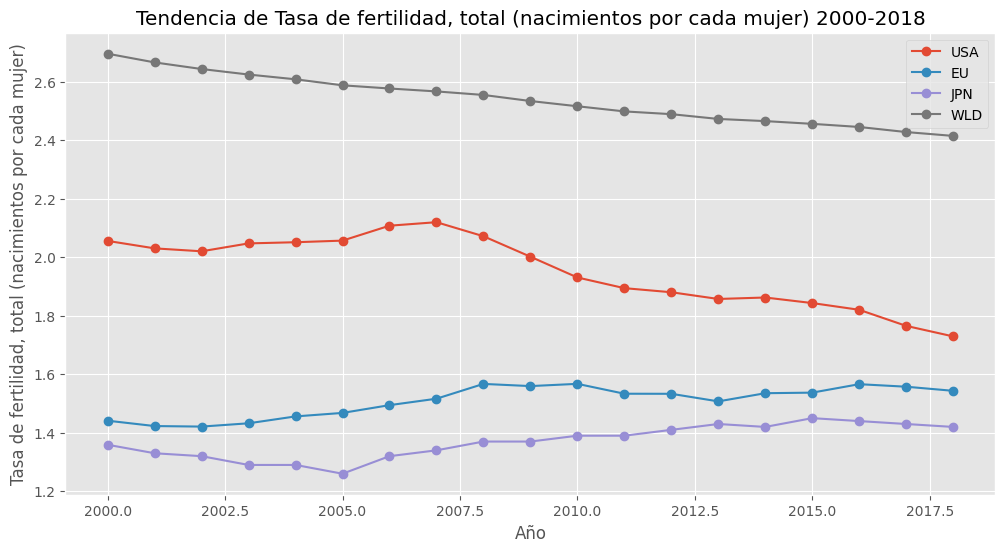

In [42]:
data = {
    'Year': list(range(2000, 2019)),
    'USA': [2.056, 2.0305, 2.0205, 2.0475, 2.0515, 2.057, 2.108, 2.12, 2.072, 2.002, 1.931, 1.8945, 1.8805, 1.8575, 1.8625, 1.8435, 1.8205, 1.7655, 1.7295],
    'EU': [1.441287, 1.422973, 1.421157, 1.432437, 1.455969, 1.467913, 1.494461, 1.516472, 1.567082, 1.559628, 1.56731, 1.533534, 1.53327, 1.507338, 1.535283, 1.537246, 1.566146, 1.557486, 1.543452],
    'JPN': [1.359, 1.33, 1.32, 1.29, 1.29, 1.26, 1.32, 1.34, 1.37, 1.37, 1.39, 1.39, 1.41, 1.43, 1.42, 1.45, 1.44, 1.43, 1.42],
    'WLD': [2.696021, 2.66631, 2.643704, 2.624844, 2.608569, 2.588012, 2.577129, 2.567128, 2.555065, 2.534292, 2.516408, 2.498808, 2.489385, 2.473019, 2.465648, 2.456264, 2.445576, 2.428196, 2.415032]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['USA'], marker='o', label='USA')
plt.plot(df['Year'], df['EU'], marker='o', label='EU')
plt.plot(df['Year'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Year'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Tasa de fertilidad, total (nacimientos por cada mujer)')
plt.title('Tendencia de Tasa de fertilidad, total (nacimientos por cada mujer) 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

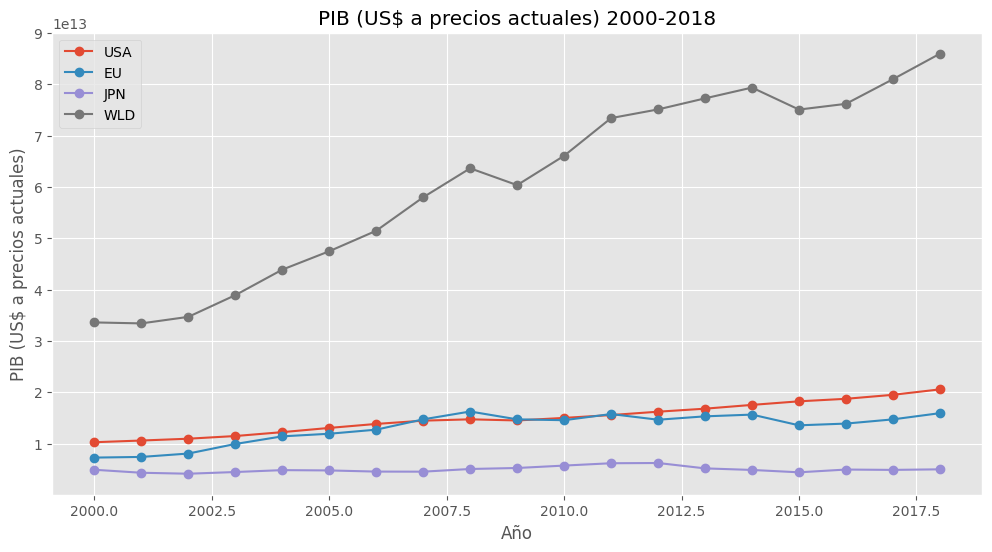

In [43]:
data = {
    'Country_Code': list(range(2000, 2019)),
    'USA': [
        10252345464000, 10581821399900, 10936419054000, 11458243878000, 12213729147000, 
        13036640229000, 13814614140000, 14451885650000, 14712844084000, 14489330520000, 
        14990252727000, 15542581040000, 16197007349000, 16784489190000, 17521746534000, 
        18219297584000, 18707188235000, 19485393853000, 20544343456936
    ],
    'EU': [
        7258060812953, 7385944125907, 8047699909021, 9909170158133, 11396119066042, 
        11902181715509, 12699806876309, 14707134757359, 16234436573911, 14707389453532, 
        14540122378882, 15740251081656, 14634470770544, 15291337809935, 15631241536377, 
        13545202459222, 13882044553929, 14701144884801, 15912779344835,
    ],
    'JPN': [
        4887519660744, 4303544259842, 4115116279069, 4445658071221, 4815148854362, 
        4755410630912, 4530377224970, 4515264514430, 5037908465114, 5231382674593, 
        5700098114744, 6157459594823, 6203213121334, 5155717056270, 4850413536087, 
        4389475622588, 4926667087367, 4859950558538, 4971323079771, 
        
    ],
    'WLD': [
        33588568226721, 33397674717513, 34674985562160, 38903667053120, 43871512446338, 
        47457731188389, 51447884999567, 57968090589081, 63610422341569, 60334303773856, 
        66049248793368, 73391477748703, 75082688938148, 77236184877355, 79334438915146, 
        75051787690892, 76166454624306, 80963190912336, 85930754374373
        
    ]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Country_Code'], df['USA'], marker='o', label='USA')
plt.plot(df['Country_Code'], df['EU'], marker='o', label='EU')
plt.plot(df['Country_Code'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Country_Code'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('PIB (US$ a precios actuales)')
plt.title('PIB (US$ a precios actuales) 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

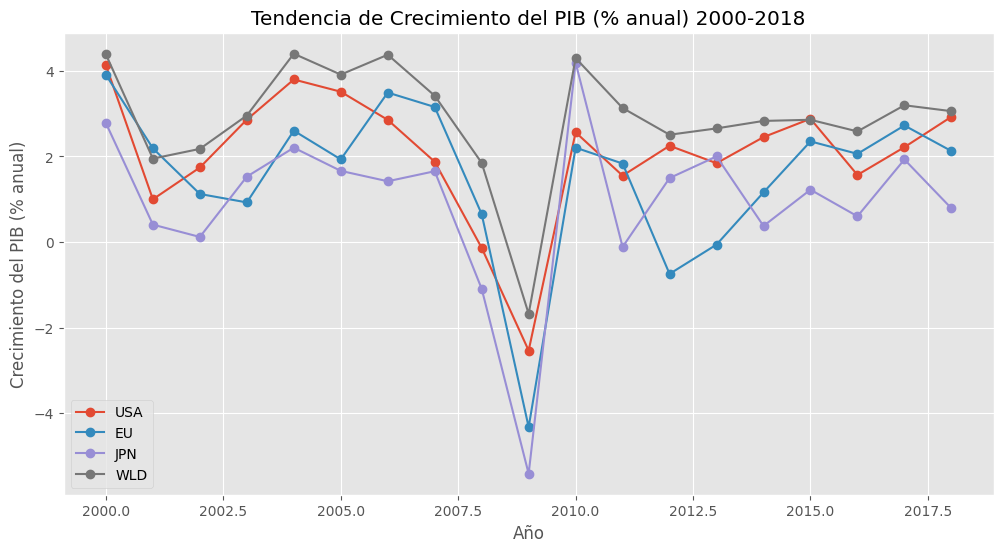

In [44]:
data = {
    'Año': list(range(2000, 2019)),
    'USA': [4.127484, 0.998341, 1.741695, 2.861211, 3.798891, 3.513214, 2.854972, 1.876171, -0.13658, -2.536757, 2.563767, 1.550836, 2.249546, 1.842081, 2.451973, 2.88091, 1.567215, 2.21701, 2.927323],
    'EU': [3.906817, 2.189414, 1.122726, 0.925509, 2.602437, 1.931168, 3.493369, 3.156144, 0.652746, -4.32698, 2.205425, 1.833849, -0.745619, -0.060616, 1.159401, 2.352356, 2.060907, 2.723967, 2.12651],
    'JPN': [2.779633, 0.406336, 0.117993, 1.52822, 2.204688, 1.66267, 1.420007, 1.654481, -1.093541, -5.416413, 4.191739, -0.115421, 1.49509, 2.000268, 0.374717, 1.222921, 0.600993, 1.928757, 0.788456],
    'WLD': [4.38356, 1.949645, 2.176793, 2.956953, 4.401295, 3.913302, 4.377542, 3.419068, 1.850115, -1.678389, 4.299175, 3.132457, 2.507626, 2.655492, 2.8305, 2.857257, 2.585116, 3.196562, 3.058395]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Año'], df['USA'], marker='o', label='USA')
plt.plot(df['Año'], df['EU'], marker='o', label='EU')
plt.plot(df['Año'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Año'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Crecimiento del PIB (% anual)')
plt.title('Tendencia de Crecimiento del PIB (% anual) 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


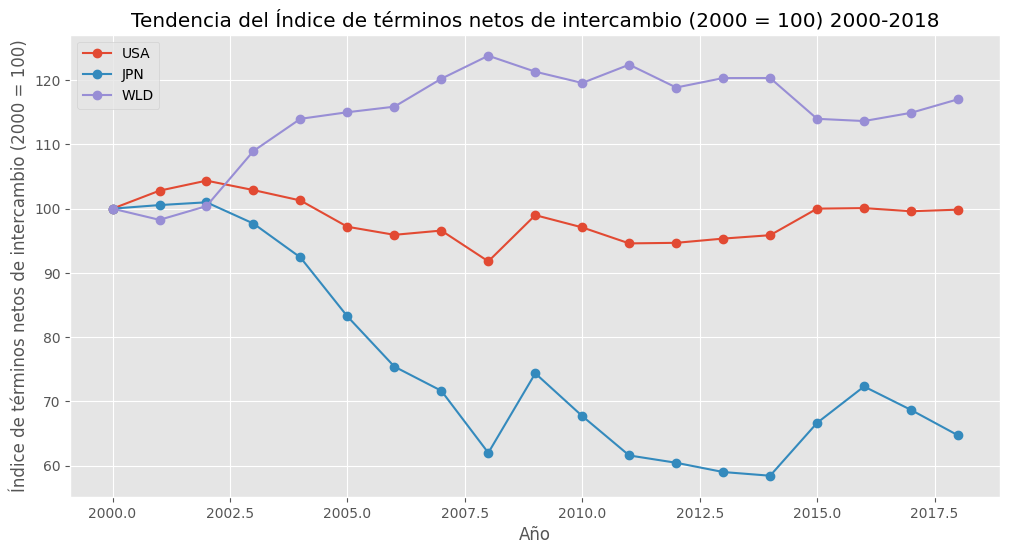

In [45]:
data = {
    'Año': list(range(2000, 2019)),
    'USA': [100, 102.797928, 104.357067, 102.889577, 101.270772, 97.181818, 95.92721, 96.589018, 91.797166, 98.988196, 97.082019, 94.594595, 94.680851, 95.340502, 95.869565, 100, 100.083472, 99.594485, 99.842644],
    'JPN': [100, 100.555556, 100.987306, 97.676624, 92.405639, 83.232811, 75.423729, 71.658456, 62.008469, 74.374152, 67.726069, 61.598029, 60.458554, 59.019426, 58.444247, 66.666667, 72.328549, 68.680331, 64.727516],
    'WLD': [100, 98.255923, 100.395695, 108.969031, 113.976816, 115.001611, 115.866333, 120.21576, 123.794177, 121.306427, 119.557344, 122.401602, 118.847093, 120.316171, 120.325203, 113.977055, 113.63034, 114.910264, 117.018084]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Año'], df['USA'], marker='o', label='USA')
plt.plot(df['Año'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Año'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Índice de términos netos de intercambio (2000 = 100)')
plt.title('Tendencia del Índice de términos netos de intercambio (2000 = 100) 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

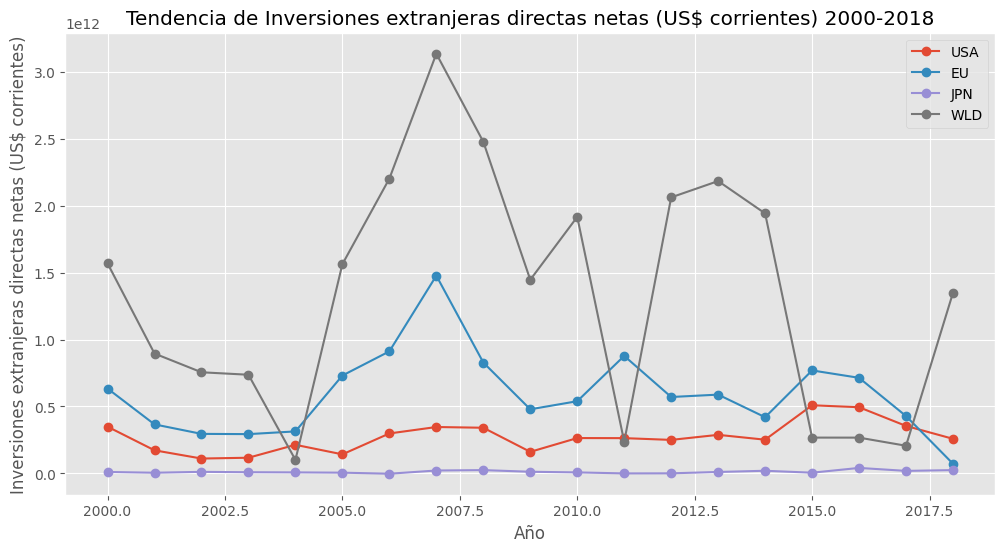

In [46]:
data = {
    'Country_Code': list(range(2000, 2019)),
    'USA': [349125000000, 172496000000, 111055000000, 117106000000, 213641000000, 
            142344000000, 298463000000, 346613000000, 341109200000, 161080000000, 
            264039000000, 263497000000, 250345000000, 288131000000, 251850000000, 
            509087000000, 494439000000, 354649000000, 258390000000],
    'EU': [633986714307, 366252770235, 295343566624, 293507610674, 313828153578,
           731279136851, 911860029116, 1477512472583, 828461316788, 478999079206, 
           539435820325, 877921989824, 570884522816, 588631025536, 419824382135, 
           769422777295, 714186136297, 428328143491, 71905793705],
    'JPN': [10688168325, 4926033619, 11557378373, 8771535612, 7527948175, 
            5459618342, -2396909736, 21631204453, 24624845329, 12226471578, 
            7440979284, -85071035, 546962692, 10648441636, 19742239442, 
            5252218412, 40954181468, 18802251820, 24605910854],
    'WLD': [1569118768884, 895499916623, 755583230625, 737213330829, 101040393064, 
            1563481637733, 2202604164398, 3135872889182, 2478032194712, 1446872840778, 
            1916740277757, 236569453985, 2062556890039, 2184451618089, 1942599797497,
            267512601680, 267290396795, 206603013320, 1349946364281]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Country_Code'], df['USA'], marker='o', label='USA')
plt.plot(df['Country_Code'], df['EU'], marker='o', label='EU')
plt.plot(df['Country_Code'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Country_Code'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Inversiones extranjeras directas netas (US$ corrientes)')
plt.title('Tendencia de Inversiones extranjeras directas netas (US$ corrientes) 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

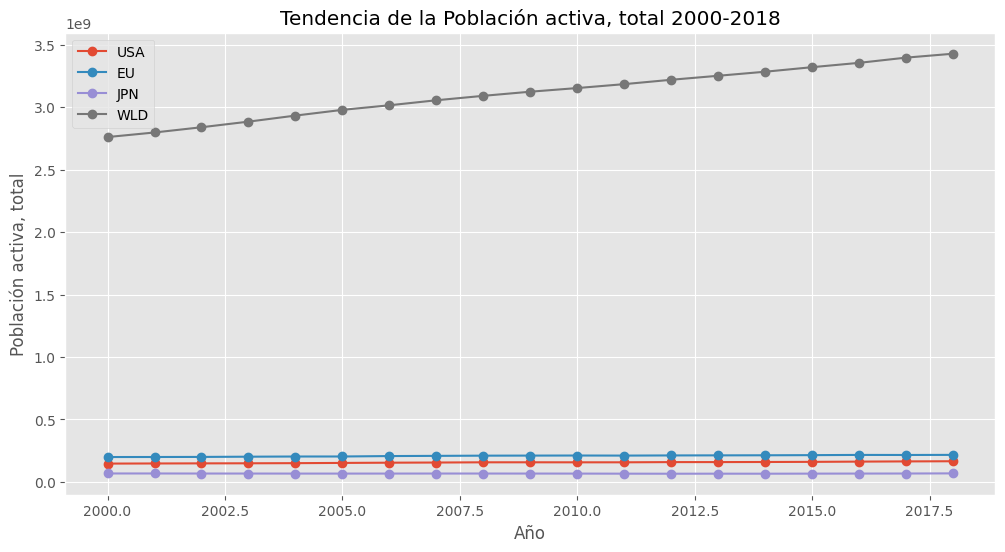

In [47]:
data = {
    'Country_Code': list(range(2000, 2019)),
    'USA': [146729576, 147698388, 148526037, 149140813, 150211571, 152071960, 153931108, 155224880, 157006864, 157109264, 156903447, 156975333, 158636184, 158755710, 159532026, 160596354, 162547573, 164268059, 165483017],
    'EU': [199217046, 199487250, 200144636, 201933394, 203395227, 203565646, 206996811, 208540629, 210215521, 210743587, 211354253, 210739030, 212039861, 212597037, 213265528, 214360167, 216148613, 215671511, 216488451],
    'JPN': [67652881, 67601019, 67173003, 67065336, 66725257, 66734012, 66802058, 67143470, 67100796, 66914282, 66663144, 66043052, 65639408, 65970039, 65766157, 66363530, 66850743, 67288838, 68358370],
    'WLD': [2760410612, 2797040580, 2838919269, 2883821977, 2932247001, 2978118240, 3014743223, 3054910730, 3090361014, 3123387038, 3152655443, 3183946265, 3218914484, 3250959724, 3283333012, 3319710285, 3354403108, 3396147862, 3427448140]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df['Country_Code'], df['USA'], marker='o', label='USA')
plt.plot(df['Country_Code'], df['EU'], marker='o', label='EU')
plt.plot(df['Country_Code'], df['JPN'], marker='o', label='JPN')
plt.plot(df['Country_Code'], df['WLD'], marker='o', label='WLD')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Población activa, total')
plt.title('Tendencia de la Población activa, total 2000-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

* Observaciones (tendencia):
  * INB per cápita: todos crecen parecido pero Japón es el más retrasado. Por ello, EU supera a Japón. USA siempre es el más alto con bastante diferencia.
  * Tasa de fertilidad: los que tenían tasa de fertilidad más alta que son WLD y luego USA estan descendiendo consistentemente. Lo sano es que sea superior a 2 y tanto USA, como JPN y EU tiene riesgo de población activa, y por lo tanto, dependen de la migración de WLD.
  * PIB: es notorio el crecimiento de WLD respecto a la otras regiones. USA se diferencia de EU y JPN.
  * Tasa de crecimiento de PIB: este gráfico explica el anterior, pues es la derivada. Es notorio que WLD siempre tiene la tasa de crecimiento más alta, mientras JPN la más baja. USA supera a EU a partir del 2008.
  * Índice de terminos netos de intercambio: lo más saludable para un pai es que sea superior a 100. Todos comienzan de forma equilibrada, WLD logra superar el 100, USA se mantiene mientras que JPN decae fuertemente.
  * Inversiones extranjeras directas netas: WLD es con diferencia el más elevado pero habría que también dividirlo por la población quizás. Pero lo cierto que es un indicador de una posible causa para incrementar el PIB.
  * Población activa: este es el resultado de la tasa de fertilidad. El único que incrementa la población activa es WLD y cada vez menos. Los demás se mantienen estables quizás por las migraciones.

#### Análisis de correlación entre variables

df_1

Consideraciones:
* Como son 4 paises, y no tiene sentidad destacar la correlación entre los distintos paises porque ya se efectuó ese análisis, entonces, se analizará las distintas variables considerando a USA.

In [83]:
columnas_unicas

Index(['Superficie (kilómetros cuadrados)',
       'INB, método Atlas (US$ a precios actuales)',
       'INB per cápita, método Atlas (US$ a precios actuales)',
       'INB, PPA (a $ internacionales actuales)',
       'INB per cápita, PPA (a $ internacionales actuales)',
       'Esperanza de vida al nacer, total (años)',
       'Tasa de fertilidad, total (nacimientos por cada mujer)',
       'Prevalencia de uso de métodos anticonceptivos (% de mujeres entre 15 y 49 años)',
       'Nacimientos asistidos por personal de salud capacitado (% del total)',
       'Tasa de mortalidad, menores de 5 años (por cada 1.000)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Inscripción escolar, nivel primario (% bruto)',
       'Inscripción escolar, nivel secundario (% bruto)',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Área selvática  (kilómetros cuadrados)',
       'Áreas pr

In [55]:
df_1_1_c = df_1_1_t.iloc[1:]

In [56]:
df_1_1_c.head(10)

Series_Name,Superficie (kilómetros cuadrados),Superficie (kilómetros cuadrados),Superficie (kilómetros cuadrados),Superficie (kilómetros cuadrados),"INB, método Atlas (US$ a precios actuales)","INB, método Atlas (US$ a precios actuales)","INB, método Atlas (US$ a precios actuales)","INB, método Atlas (US$ a precios actuales)","INB per cápita, método Atlas (US$ a precios actuales)","INB per cápita, método Atlas (US$ a precios actuales)",...,"Población entre 15 y 64 años de edad, mujeres","Población entre 15 y 64 años de edad, mujeres","Población entre 15 y 64 años de edad, total","Población entre 15 y 64 años de edad, total","Población entre 15 y 64 años de edad, total","Población entre 15 y 64 años de edad, total","Población activa, mujeres (% de la población activa total)","Población activa, mujeres (% de la población activa total)","Población activa, mujeres (% de la población activa total)","Población activa, mujeres (% de la población activa total)"
2000,9632030,4384964.995117,377800,131606512.293178,10147603801972.083984,7922739957040.177734,4595162800787.34082,33561947316609.425781,35960,18453.789275,...,42839220,1904116650,186123865,289419527,86547107,3848454670,45.562645,43.552329,40.3536,39.493477
2001,9632030,4384984.995117,377880,131606902.668177,10462204209818.1875,7639017402698.374023,4675882499303.015625,33848117667858.640625,36710,17769.469855,...,42736040,1936530565,188528528,289835272,86351420,3913855934,45.621492,43.643783,40.556201,39.474709
2002,9632030,4385294.995117,377890,131607327.418178,10732675433275.623047,7515657598848.955078,4434184873540.571289,34017960211925.816406,37310,17442.498354,...,42632297,1971223387,190730595,290496921,86156721,3984135046,45.673366,43.787335,40.524048,39.475697
2003,9632030,4385644.995117,377900,131607728.793148,11536447371063.488281,8523562906388.888672,4479549240351.105469,36997067184469.984375,39770,19711.491038,...,42511460,2007338808,192788756,291505694,85930942,4057586010,45.823671,43.999299,40.695442,39.509199
2004,9632030,4385414.995117,377910,131605872.777079,12740511355508.546875,10408524663469.884766,4899554578633.611328,42684534716336.234375,43510,23980.552493,...,42287796,2043337178,195059592,292581249,85503551,4131084573,45.754826,44.139039,40.852812,39.487061
2005,9632030,4385434.995117,377910,131607830.159892,13651359826763.560547,12019963315038.761719,5182637712714.898438,47889487891691.554688,46190,27595.182359,...,42017934,2078256581,197426230,293620893,84991747,4202650595,45.787307,44.247409,40.997968,39.503037
2006,9632030,4385724.995117,377920,131608165.134891,14285630945718.449219,12933305815644.914062,5105064678226.856445,51727094199598.09375,47880,29595.797613,...,41797207,2111453512,199322426,294228323,84556631,4270225325,45.769637,44.451845,41.124422,39.414396
2007,9632030,4385704.995117,377930,131608206.109878,14608317798282.019531,13880684138736.708984,4959300110562.365234,55816858147447.578125,48500,31657.20526,...,41570784,2143773746,201337589,294924755,84116655,4336247546,45.82259,44.5756,41.119396,39.372364
2008,9831510,4385719.995117,377940,131807675.133315,14894712325833.945312,15126465192403.052734,4975181428117.334961,60496591262737.34375,48980,34387.968461,...,41284635,2175412341,203378186,295551560,83563130,4401072020,45.973009,44.722406,41.259549,39.261796
2009,9831510,4385855.996094,377946.992188,131805348.055386,14643696781531.105469,15217828701351.589844,4967603590411.748047,61441779950219.765625,47730,34513.981294,...,40933588,2206281587,205162922,295802677,82886937,4464456992,46.18004,44.973922,41.591816,39.221349


In [ ]:
# Obtener las columnas únicas
uniq_col_df_1 = df_1_1_c.columns[~df_1_1_c.columns.duplicated()]

uniq_col_df_1


Index(['Superficie (kilómetros cuadrados)',
       'INB, método Atlas (US$ a precios actuales)',
       'INB per cápita, método Atlas (US$ a precios actuales)',
       'INB, PPA (a $ internacionales actuales)',
       'INB per cápita, PPA (a $ internacionales actuales)',
       'Esperanza de vida al nacer, total (años)',
       'Tasa de fertilidad, total (nacimientos por cada mujer)',
       'Prevalencia de uso de métodos anticonceptivos (% de mujeres entre 15 y 49 años)',
       'Nacimientos asistidos por personal de salud capacitado (% del total)',
       'Tasa de mortalidad, menores de 5 años (por cada 1.000)',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Inscripción escolar, nivel primario (% bruto)',
       'Inscripción escolar, nivel secundario (% bruto)',
       'Proporción de niñas con respecto a niños en educación primaria y secundaria (%)',
       'Área selvática  (kilómetros cuadrados)',
       'Áreas pr

In [71]:
# Función para renombrar las columnas
def rename_columns(df):
    suffixes = ['_USA', '_EU', '_JPN', '_WLD']
    new_columns = []
    suffix_index = {}

    for col in df.columns:
        base_name = col.split('_')[0]  # Obtener el nombre base sin sufijo
        if base_name not in suffix_index:
            suffix_index[base_name] = 0
        count = suffix_index[base_name]
        if count >= len(suffixes):
            count = len(suffixes) - 1  # Usar el último sufijo si se excede
        new_col = f"{base_name}{suffixes[count]}"
        new_columns.append(new_col)
        suffix_index[base_name] += 1  # Incrementar el índice para el siguiente sufijo
    
    return new_columns

# Asignar los nuevos nombres de columnas al DataFrame
df_1_1_c.columns = rename_columns(df_1_1_c)

# Mostrar las nuevas columnas
print(df_1_1_c.columns)

Index(['Superficie (kilómetros cuadrados)_USA',
       'Superficie (kilómetros cuadrados)_EU',
       'Superficie (kilómetros cuadrados)_JPN',
       'Superficie (kilómetros cuadrados)_WLD',
       'INB, método Atlas (US$ a precios actuales)_USA',
       'INB, método Atlas (US$ a precios actuales)_EU',
       'INB, método Atlas (US$ a precios actuales)_JPN',
       'INB, método Atlas (US$ a precios actuales)_WLD',
       'INB per cápita, método Atlas (US$ a precios actuales)_USA',
       'INB per cápita, método Atlas (US$ a precios actuales)_EU',
       ...
       'Población entre 15 y 64 años de edad, mujeres_JPN',
       'Población entre 15 y 64 años de edad, mujeres_WLD',
       'Población entre 15 y 64 años de edad, total_USA',
       'Población entre 15 y 64 años de edad, total_EU',
       'Población entre 15 y 64 años de edad, total_JPN',
       'Población entre 15 y 64 años de edad, total_WLD',
       'Población activa, mujeres (% de la población activa total)_USA',
       'Pobl

In [85]:
pd.set_option('display.max_columns', None)

for column in df_1_1_c.columns:
    print(column)


Superficie (kilómetros cuadrados)_USA
Superficie (kilómetros cuadrados)_EU
Superficie (kilómetros cuadrados)_JPN
Superficie (kilómetros cuadrados)_WLD
INB, método Atlas (US$ a precios actuales)_USA
INB, método Atlas (US$ a precios actuales)_EU
INB, método Atlas (US$ a precios actuales)_JPN
INB, método Atlas (US$ a precios actuales)_WLD
INB per cápita, método Atlas (US$ a precios actuales)_USA
INB per cápita, método Atlas (US$ a precios actuales)_EU
INB per cápita, método Atlas (US$ a precios actuales)_JPN
INB per cápita, método Atlas (US$ a precios actuales)_WLD
INB, PPA (a $ internacionales actuales)_USA
INB, PPA (a $ internacionales actuales)_EU
INB, PPA (a $ internacionales actuales)_JPN
INB, PPA (a $ internacionales actuales)_WLD
INB per cápita, PPA (a $ internacionales actuales)_USA
INB per cápita, PPA (a $ internacionales actuales)_EU
INB per cápita, PPA (a $ internacionales actuales)_JPN
INB per cápita, PPA (a $ internacionales actuales)_WLD
Esperanza de vida al nacer, total (añ

In [100]:
df_1_1_c['Población entre 0 y 14 años de edad, total_USA']

2000    61237370
2001    61349552
2002    61540958
2003    61700652
2004    61781645
2005    61707218
2006    62115320
2007    62324459
2008    62414797
2009    62456435
2010    62497826
2011    62389679
2012    62211250
2013    61988641
2014    61802095
2015    61638027
2016    61434232
2017    61287489
2018    61120095
Name: Población entre 0 y 14 años de edad, total_USA, dtype: int64

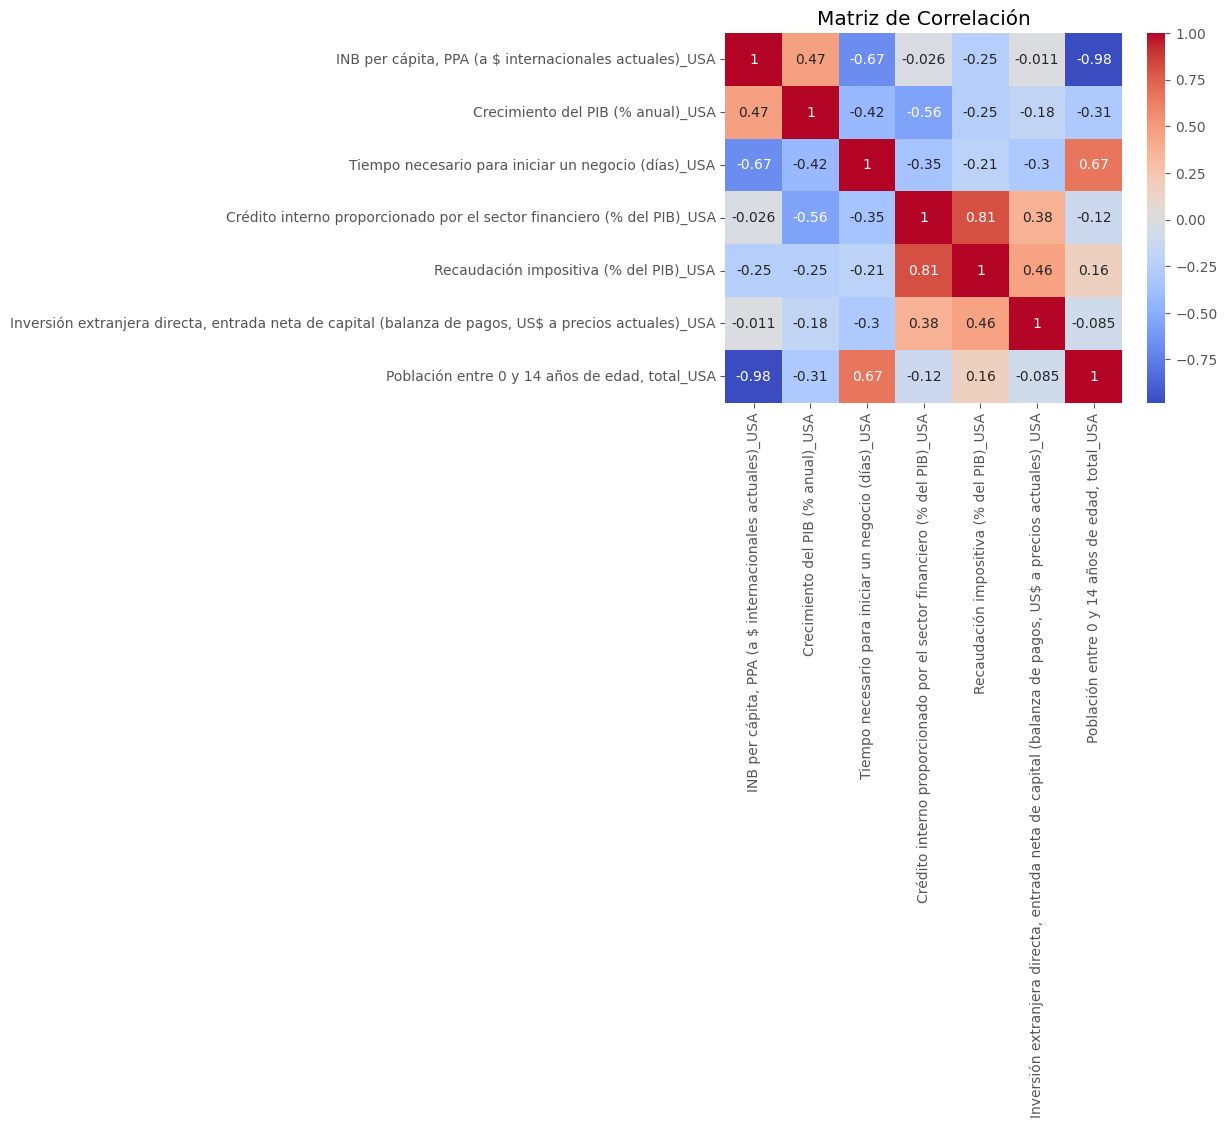

In [110]:
# Calcular la matriz de correlación incluyendo las columnas seleccionadas
columns_to_use = ['INB per cápita, PPA (a $ internacionales actuales)_USA', 
                  'Crecimiento del PIB (% anual)_USA', 
                  'Tiempo necesario para iniciar un negocio (días)_USA', 
                  'Crédito interno proporcionado por el sector financiero (% del PIB)_USA', 
                  'Recaudación impositiva (% del PIB)_USA', 
                  'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)_USA',
                  'Población entre 0 y 14 años de edad, total_USA']

df_1_1_c_clean = df_1_1_c[columns_to_use].dropna()

df_1_1_corr = df_1_1_c_clean.corr()

# Visualizar la matriz de correlación
sns.heatmap(df_1_1_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
* Se observan correlaciones muy positivas y muy negativas.
* La tasa de fertilidad se quitó porque está altamente correlacionada con la población entre 0 y 14 años y se prefiere esta variable porque el análisis se está realizando 6 años depués al ultimo dato (2018) y la mayoria de este rango ya debe estar empezando a jugar y así lo harán por muchos años más.
* INB per capita es totalmente opuesto con la población entre 0 y 14 años. Parece contradictorio, pero lo cierto es que si no aumenta la tasa de natalidad, no hay juventud, y tampoco se abrirán puestos de trabajo. Quizas como no hay suficiente tiempo no se han visto los efectos negativos.
* Por lo mencionado, existe una alta correlación entre la población entre 0 y 14 y la tasa de fertilidad.
* La migración puede suplir el punto anterior, pero no se pudo analizar porque no hay datos suficientes.

#### Análisis de duplicados

In [113]:
# Identificar duplicados
duplicated_rows = df_1_1_c.duplicated()

# Mostrar filas duplicadas
print("Filas duplicadas:")
print(df_1_1_c[duplicated_rows])

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()
print(f"Numero de filas duplicadas: {num_duplicated_rows}")

if num_duplicated_rows == 0:
    print('No se encuentran duplicadas en el dataframe')

Filas duplicadas:
Empty DataFrame
Columns: [Superficie (kilómetros cuadrados)_USA, Superficie (kilómetros cuadrados)_EU, Superficie (kilómetros cuadrados)_JPN, Superficie (kilómetros cuadrados)_WLD, INB, método Atlas (US$ a precios actuales)_USA, INB, método Atlas (US$ a precios actuales)_EU, INB, método Atlas (US$ a precios actuales)_JPN, INB, método Atlas (US$ a precios actuales)_WLD, INB per cápita, método Atlas (US$ a precios actuales)_USA, INB per cápita, método Atlas (US$ a precios actuales)_EU, INB per cápita, método Atlas (US$ a precios actuales)_JPN, INB per cápita, método Atlas (US$ a precios actuales)_WLD, INB, PPA (a $ internacionales actuales)_USA, INB, PPA (a $ internacionales actuales)_EU, INB, PPA (a $ internacionales actuales)_JPN, INB, PPA (a $ internacionales actuales)_WLD, INB per cápita, PPA (a $ internacionales actuales)_USA, INB per cápita, PPA (a $ internacionales actuales)_EU, INB per cápita, PPA (a $ internacionales actuales)_JPN, INB per cápita, PPA (a $ inte

#### Exportación de los DataFrames

In [ ]:
df_1_1_c.to_csv('dataset_clean/Indicadores del desarrollo humano.csv', index=False)

#### Conclusiones

1. La tasa de fertilidad está en rangos muy malos, y es necesario incrementarla en todas las regiones, y mantenerla en WLD.
2. Japón no es una región recomendable para invertir: 
   1. No crecerá en superficie ni en población:
      1. No tiene casi área selvática.
      2. La población continuará avejentándose.
      3. Probablemente necesite aumentar la recaudación impositiva para ayudar a los más ancianos.
   2. Tiene un stock de deuda muy alto, por lo cual:
      1. Necesitará aumentar la recaudación impositiva, impactando negativamente en las inversiones.
      2. No puede pedir más deuda para crecer.
3. La Unión Europea está en mejores condiciones que Japón, pero de a poco se está acercando a sus prácticas negativas, es decir, se está japonizando. Por lo cual, es una región mejor que Japón pero tampoco sería un país recomendable para invertir.
4. Estados Unidos es una región aceptable para invertir al presente:
   1. Continúa siendo un pais atractivo para migraciones, es la más elevada entre los 4.
   2. Tiene mucha área selvática para recibir migraciones.
   3. Tiene tanta población entre 0 y 14 como toda la Unión Europea.
   4. Es quien recibe más inversión extranjera.
   5. La recaudación como porcentaje del PIB es la menor.
   6. El tiempo en dias para iniciar un negocio es de solo 5 días.
5. Señales de alarma para Estados Unidos:
   1. Si bien aumentó su stock de deuda, está muy lejos de Japón por ejemplo.
   2. Su tasa de fertilidad ha ido retrocediendo significativamente en los últimos años y está por debajo de 2, dependiendo de las migraciones para aumentar su población y generar empleo.
6. El resto del mundo es una región aceptable para invertir, quizás, pensando más en el futuro:
   1. Cuenta con la tasa de fertilidad más elevada y con mucha población activa.
   2. Cuenta con mucha área selvática para aumentar zonas para vivir.
   3. Recibe también bastante inversión extranjera.
   4. La recaudación es superior a Estados Unidos pero va por detrás.
   5. El tiempo en dias para iniciar un negocio no es poco aún, pero continua disminuyendo.
   6. No tiene las señales de alarma que tiene Estados Unidos.
7. El resto del mundo presenta el problema de que cuenta con paises de Asia (excepto Japón), Africa, Oceania, y América Latina, y el resto de Europa que no está dentro de la Unión Europea. Y lo peor de ello, es que China e India son los más importantes por lejos respecto a los otros, es decir, no es un región que nos ayude a identificar para invertir.
8. Finalmente, el pais más recomendable en este primer análisis es USA, y WLD es una buena opción pero hay que hacer un análisis dentro de este, o separar mejor las regiones, quizas: China, India, Resto de paises desarrollados, América Latina, Africa, y resto.